<a href="https://colab.research.google.com/github/lucianosilvacraam/astro/blob/master/Astroinform%C3%A1tica_II_Aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo da Aula: continuar trabalhando com o modelo de trânsitos planetários e realizar ajustes com dados do simulador.

Instalação do módulo ktransit


In [1]:
!pip install ktransit

  Created wheel for ktransit: filename=ktransit-0.2.5-cp36-cp36m-linux_x86_64.whl size=125722 sha256=6944afda230cd18c2cbac54e0400b484f29bdbf80471cb24e3092a8d45c7095e
  Stored in directory: /root/.cache/pip/wheels/1f/07/3a/5ab602c06a4a0c4e9eec7addf2c88c9aca5c19694cfd8aec61
Successfully built ktransit


Modelo genérico de trânsito

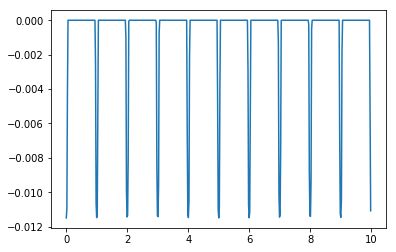

In [2]:
import ktransit
import matplotlib.pyplot as plt
%matplotlib inline

M = ktransit.LCModel()
M.add_star()
M.add_planet()
M.add_data()

tmod = M.transitmodel
plt.plot(M.time,tmod)

Modelo com trânsito da Terra em torno do Sol

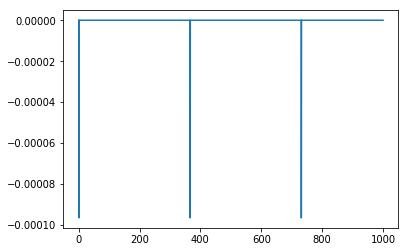

In [3]:
time,earthlc = ktransit.give_me_earth()
plt.plot(time,earthlc)

# Modelo com curvas e dados simulados

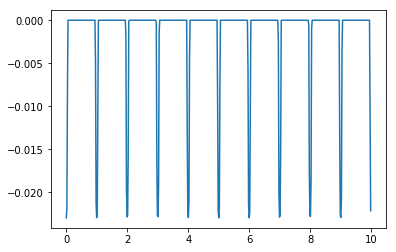

In [12]:
import ktransit
import matplotlib.pyplot as plt
import numpy

M = ktransit.LCModel()
M.add_star(
        rho=1.5, # mean stellar density in cgs units
        ld1=0.2, # ld1--4 are limb darkening coefficients 
        ld2=0.4, # if only ld1 and ld2 are non-zero then a quadratic limb darkening law is used
        ld3=0.0, # if all four parameters are non-zero we use non-linear flavour limb darkening
        ld4=0.0, 
        dil=0.0, # a dilution factor: 0.0 -> transit not diluted, 0.5 -> transit 50% diluted
        zpt=0.0  # a photometric zeropoint, incase the normalisation was wonky
        )
M.add_planet(
        T0=1.0,     # a transit mid-time  
        period=1.0, # an orbital period in days
        impact=0.1, # an impact parameter
        rprs=0.1,   # planet stellar radius ratio  
        ecosw=0.0,  # eccentricity vector
        esinw=0.0,
        occ=0.0)    # a secondary eclipse depth in ppm

M.add_planet() # you can add as many planets as you like (up to 10)

M.add_data(
        time=numpy.arange(0,10,0.0188),                                 # timestamps to evaluate the model on
        itime=numpy.zeros_like(numpy.arange(0,10,0.0188))+0.0188 )      # integration time of each timestamp

tmod = M.transitmodel # the out of transit data will be 0.0 unless you specify zpt
plt.plot(M.time,tmod)

Ajuste de parâmetros de modelos

In [10]:
from ktransit import FitTransit
import numpy as np

time = np.arange(0,10,0.0188)           # you need a time and a flux
flux = np.zeros_like(time)              # there are no transits here :(
ferr = np.ones_like(time) * 0.00001     # uncertainty on the data

fitT = FitTransit()
fitT.add_guess_star(rho=7.0)    
fitT.add_guess_planet(
        period=365.25, impact=0.0, 
        T0=0.0, rprs=0.009155)
fitT.add_data(time=time, flux=flux, ferr=ferr)

vary_star = ['rho', 'zpt']      # free stellar parameters
vary_planet = (['period',       # free planetary parameters
        'T0', 'impact', 
        'rprs'])                # free planet parameters are the same for every planet you model

fitT.free_parameters(vary_star, vary_planet)
fitT.do_fit()                   # run the fitting

fitT.print_results()            # print some results

Best-fitting stellar parameters
rho: 31.015565739570285
zpt: -6.927634896727882e-10

Best-fitting planet parameters for planet 0
period: 1627.6674916223426
T0: -0.001278216279243425
impact: -2.1091337128918166
rprs: 0.004578852529839324



Exibição dos resultados de simulação

/usr/local/lib/python3.6/dist-packages/ktransit/fittransit.py:326: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  np.max(obsf)+0.2*yrng])
/usr/local/lib/python3.6/dist-packages/ktransit/fittransit.py:337: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=6.927635132214505e-10, top=6.927635132214505e-10
  np.max(obsf - model)+0.2*yrng2])


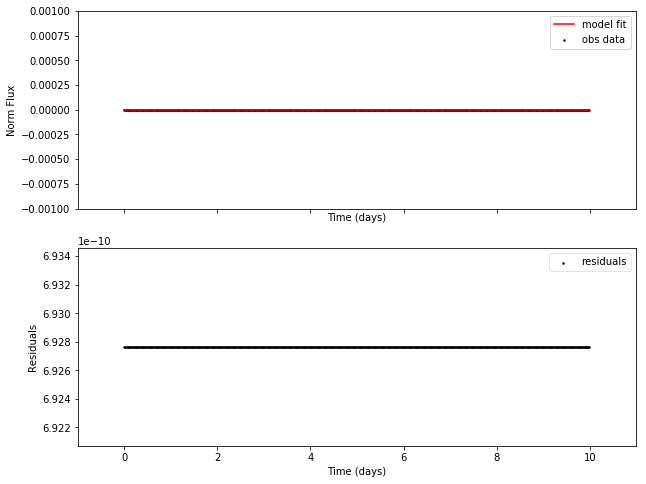

In [13]:
fig = ktransit.plot_results(time,flux,fitT.transitmodel)
fig.show()

Ajustes de dados de alguns exoplantas.

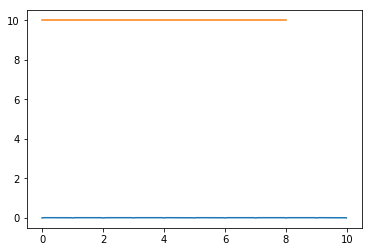

In [11]:
import ktransit
import matplotlib.pyplot as plt
import numpy

M = ktransit.LCModel()
M.add_star(
        rho=1.5,
        ld1=0.2,
        ld2=0.4, 
        ld3=0.0,
        ld4=0.0, 
        dil=0.0,
        zpt=0.0, 
        veloffset=10 # new keyword, the radial velocity zero-point offset in m/s   
        )
M.add_planet(
        T0=1.0,     
        period=1.0,
        impact=0.1,
        rprs=0.1,  
        ecosw=0.0, 
        esinw=0.0,
        occ=0.0,  
        rvamp=100.) # radial velocity semi-amplitude in m/s

M.add_data(
        time=numpy.arange(0,10,0.0188),   
        itime=numpy.zeros_like(numpy.arange(0,10,0.0188))+0.0188 )

M.add_rv(rvtime=numpy.arange(0,10,2.),                             # radial velocity observation timestamps
        rvitime=numpy.zeros_like(numpy.arange(0,10,2.))+0.02 )    # integration time of each timestamp

tmod = M.transitmodel
rvmodel = M.rvmodel
plt.plot(M.time,tmod)
plt.plot(M.rvtime,rvmodel)
